In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline


# Dataset is being imported into Pandas DF

In [484]:
df = pd.read_excel('StudentsGrade.xlsx')
df

,Students,Course1,Course2,Course3,Course4,Course5,Course6
0,a,4,7,5,5,6,10
1,b,7,10,7,2,7,10
2,c,6,8,9,2,7,9
3,d,2,8,7,3,5,10
4,e,6,7,9,3,4,10
5,f,9,7,6,7,8,8
6,g,3,9,4,7,5,9
7,h,8,8,6,8,4,8
8,i,5,10,10,7,8,10
9,j,9,8,9,4,7,8


# Adding the grades column

In [3]:
# Copying the origina df into dfFC

dfFC = df.copy()

grades = [0,1,2,3,4,5,6,7,8,9,10] # list for the grades
dfFC['Grades'] = grades # Creating the Grades column from the list

**Here below the newly created dfFC dataframe, including Grades column**

In [4]:
dfFC

,Students,Course1,Course2,Course3,Course4,Course5,Course6,Grades
0,a,3,6,6,7,4,8,0
1,b,3,7,7,2,5,10,1
2,c,6,8,6,2,6,9,2
3,d,4,9,5,8,6,8,3
4,e,7,10,7,9,6,9,4
5,f,2,8,7,8,6,10,5
6,g,2,7,10,7,5,9,6
7,h,4,7,7,5,5,9,7
8,i,3,6,5,3,7,8,8
9,j,6,7,9,8,6,10,9


# Creating the cumulative column

In [5]:
x=dfFC[dfFC[['Course1','Course2','Course3','Course4','Course5','Course6']]<=5].count()
x

Students    0
Course1     8
Course2     0
Course3     3
Course4     5
Course5     4
Course6     0
Grades      0
dtype: int64

In [368]:
x=dfFC[dfFC[['Course1','Course2','Course3','Course4','Course5','Course6']]<=5].count()
c = 0
for i in x:
    c = c+i
x

Students                      0
Course1                       8
Course2                       0
Course3                       3
Course4                       5
Course5                       4
Course6                       0
Grades                        0
Cumulative                    0
Frequency                     0
Cumulative%                   0
Frequency%                    0
Sum                           0
Mean                          0
Std_Dev                       0
Skew                          0
Kurtosis                      0
Mean_All_Grades_Student       0
Std_Dev_All_Grades_Student    0
dtype: int64

Above we have tried counting cumulatively all the values <= 5. 

Below the method above is set into a loop where the condition is taken from the rown in the Grade column. Finally a list is created that contains the cumulative count of each condition according the row in the Grade column. 

In [7]:
clist = []
for i in dfFC['Grades']:
    x=dfFC[dfFC[['Course1','Course2','Course3','Course4','Course5','Course6']]<=i].count()   
    c = 0
    for j in x:
        c = c+j
    clist.append(c)   

clist

[0, 0, 4, 9, 13, 20, 32, 44, 53, 61, 66]

In [8]:
print(len(clist))
print(df.shape)

11
(11, 7)


Length of the list is same as the total number of rows of dfFC. So we can make a new column from this list, without problems. 

In [9]:
dfFC['Cumulative'] = clist
dfFC

,Students,Course1,Course2,Course3,Course4,Course5,Course6,Grades,Cumulative
0,a,3,6,6,7,4,8,0,0
1,b,3,7,7,2,5,10,1,0
2,c,6,8,6,2,6,9,2,4
3,d,4,9,5,8,6,8,3,9
4,e,7,10,7,9,6,9,4,13
5,f,2,8,7,8,6,10,5,20
6,g,2,7,10,7,5,9,6,32
7,h,4,7,7,5,5,9,7,44
8,i,3,6,5,3,7,8,8,53
9,j,6,7,9,8,6,10,9,61


# Creating the frequency column

Here below is the same method as the method from cumulative count, the only difference is the condition: instead of <= grade, == grade is used to count the values, so that we can see the frequency of the grades. 

In [10]:
x=dfFC[dfFC[['Course1','Course2','Course3','Course4','Course5','Course6']]==5].count()   
x

Students      0
Course1       1
Course2       0
Course3       2
Course4       1
Course5       3
Course6       0
Grades        0
Cumulative    0
dtype: int64

In [11]:
flist = []
for i in dfFC['Grades']:
    x=dfFC[dfFC[['Course1','Course2','Course3','Course4','Course5','Course6']]==i].count()   
    c = 0
    for j in x:
        c = c+j
    flist.append(c)   

flist

[0, 0, 4, 5, 4, 7, 12, 12, 9, 8, 5]

In [12]:
dfFC['Frequency'] = flist
dfFC

,Students,Course1,Course2,Course3,Course4,Course5,Course6,Grades,Cumulative,Frequency
0,a,3,6,6,7,4,8,0,0,0
1,b,3,7,7,2,5,10,1,0,0
2,c,6,8,6,2,6,9,2,4,4
3,d,4,9,5,8,6,8,3,9,5
4,e,7,10,7,9,6,9,4,13,4
5,f,2,8,7,8,6,10,5,20,7
6,g,2,7,10,7,5,9,6,32,12
7,h,4,7,7,5,5,9,7,44,12
8,i,3,6,5,3,7,8,8,53,9
9,j,6,7,9,8,6,10,9,61,8


# Frequency and Cumulative in %

In [13]:
dfFC

,Students,Course1,Course2,Course3,Course4,Course5,Course6,Grades,Cumulative,Frequency
0,a,3,6,6,7,4,8,0,0,0
1,b,3,7,7,2,5,10,1,0,0
2,c,6,8,6,2,6,9,2,4,4
3,d,4,9,5,8,6,8,3,9,5
4,e,7,10,7,9,6,9,4,13,4
5,f,2,8,7,8,6,10,5,20,7
6,g,2,7,10,7,5,9,6,32,12
7,h,4,7,7,5,5,9,7,44,12
8,i,3,6,5,3,7,8,8,53,9
9,j,6,7,9,8,6,10,9,61,8


Right now the dfFC contains cumulative count and frequency count. It is time to add percentiles of Cumulative and Frequency columns. To do so we need to have the count of all values of Course1 to Course 6, which 66 (6 courses * 10 students) and multiply it with 100, which 6600. 

In [14]:
# Counting ind values in C1 to C6 (6x11=66,66*100=6600)

x=dfFC[['Course1','Course2','Course3','Course4','Course5','Course6']].count().sum()*100
x

6600

In [15]:
cm=dfFC[dfFC[['Course1','Course2','Course3','Course4','Course5','Course6']]==8].count().sum()
cm_=round((cm/x)*10000,1)
cm_

13.6

In [16]:
# Cumulative % list
clist = []
count=dfFC[['Course1','Course2','Course3','Course4','Course5','Course6']].count().sum()*100

for i in dfFC['Grades']:
    x=dfFC[dfFC[['Course1','Course2','Course3','Course4','Course5','Course6']]<=i].count().sum()
    y = round((x/count)*10000,1)
    clist.append(y)

clist

[0.0, 0.0, 6.1, 13.6, 19.7, 30.3, 48.5, 66.7, 80.3, 92.4, 100.0]

In [17]:
# Frequency % list

flist = []
count=dfFC[['Course1','Course2','Course3','Course4','Course5','Course6']].count().sum()*100

for i in dfFC['Grades']:
    x=dfFC[dfFC[['Course1','Course2','Course3','Course4','Course5','Course6']]==i].count().sum()
    y = round((x/count)*10000,1)
    flist.append(y)

flist

[0.0, 0.0, 6.1, 7.6, 6.1, 10.6, 18.2, 18.2, 13.6, 12.1, 7.6]

In [18]:
dfFC['Cumulative%'] = clist
dfFC['Frequency%'] = flist
dfFC

,Students,Course1,Course2,Course3,Course4,Course5,Course6,Grades,Cumulative,Frequency,Cumulative%,Frequency%
0,a,3,6,6,7,4,8,0,0,0,0.0,0.0
1,b,3,7,7,2,5,10,1,0,0,0.0,0.0
2,c,6,8,6,2,6,9,2,4,4,6.1,6.1
3,d,4,9,5,8,6,8,3,9,5,13.6,7.6
4,e,7,10,7,9,6,9,4,13,4,19.7,6.1
5,f,2,8,7,8,6,10,5,20,7,30.3,10.6
6,g,2,7,10,7,5,9,6,32,12,48.5,18.2
7,h,4,7,7,5,5,9,7,44,12,66.7,18.2
8,i,3,6,5,3,7,8,8,53,9,80.3,13.6
9,j,6,7,9,8,6,10,9,61,8,92.4,12.1


# Calculating sum, mean, std dev, skewness and	kurtosis for each student

In this section 5 more columns will be created in dfFC which will contain statistical calculation results for each student


In [19]:
dft = df.copy()
dft = dft.drop(columns='Students', axis=1)
dft.head(2)

,Course1,Course2,Course3,Course4,Course5,Course6
0,3,6,6,7,4,8
1,3,7,7,2,5,10


## Sum of grades per student

In [20]:
# Sum of grades per student

sum_list = []

ind = 0
for i,j,k,x,y,z in dft.itertuples(index=False):
    
    sum_list.append(sum([i,j,k,x,y,z]))    


In [21]:
sum_list

[34, 34, 37, 40, 48, 41, 40, 37, 32, 46, 35]

## Mean of grades per student

In [22]:
# Mean of all grades of all students
ind = []
for i, row in dft.iterrows():
    
    ind.append(row)
    
print('The lenght of ind is: '+ str(len(ind)))
print(ind[0])

The lenght of ind is: 11
Course1    3
Course2    6
Course3    6
Course4    7
Course5    4
Course6    8
Name: 0, dtype: int64


In [233]:
# Mean of all grades of per student
mean_list = []

for i in ind:
    mean_list.append(round(i.mean(),2))
    
mean_list

[5.67, 5.67, 6.17, 6.67, 8.0, 6.83, 6.67, 6.17, 5.33, 7.67, 5.83]

## Std Dev grades per student

In [28]:
std_list = round(dft.std(axis=1),2)
std_list

0     1.86
1     2.94
2     2.40
3     1.97
4     1.55
5     2.71
6     2.88
7     1.83
8     2.07
9     1.63
10    2.32
dtype: float64

## Skewness grades per student

In [32]:
skew_list = round(dft.skew(axis=1),2)
skew_list

0    -0.39
1     0.21
2    -0.94
3    -0.25
4     0.00
5    -1.18
6    -0.71
7     0.51
8    -0.05
9     0.38
10    0.30
dtype: float64

## Kurtosis grades per student

In [37]:
kurt_list = round(dft.kurtosis(axis=1),2)
kurt_list

0    -0.94
1    -0.75
2     1.69
3    -1.83
4    -1.88
5     2.14
6     0.26
7    -0.62
8    -1.72
9    -1.48
10   -1.42
dtype: float64

In [236]:
# Adding all stat columns into dfFC

dfFC['Sum']=sum_list
dfFC['Mean'] = mean_list
dfFC['Std_Dev'] = std_list
dfFC['Skew'] = skew_list
dfFC['Kurtosis'] = kurt_list
dfFC

,Students,Course1,Course2,Course3,Course4,Course5,Course6,Grades,Cumulative,Frequency,Cumulative%,Frequency%,Sum,Mean,Std_Dev,Skew,Kurtosis
0,a,3,6,6,7,4,8,0,0,0,0.0,0.0,34,5.67,1.86,-0.39,-0.94
1,b,3,7,7,2,5,10,1,0,0,0.0,0.0,34,5.67,2.94,0.21,-0.75
2,c,6,8,6,2,6,9,2,4,4,6.1,6.1,37,6.17,2.40,-0.94,1.69
3,d,4,9,5,8,6,8,3,9,5,13.6,7.6,40,6.67,1.97,-0.25,-1.83
4,e,7,10,7,9,6,9,4,13,4,19.7,6.1,48,8.00,1.55,0.00,-1.88
5,f,2,8,7,8,6,10,5,20,7,30.3,10.6,41,6.83,2.71,-1.18,2.14
6,g,2,7,10,7,5,9,6,32,12,48.5,18.2,40,6.67,2.88,-0.71,0.26
7,h,4,7,7,5,5,9,7,44,12,66.7,18.2,37,6.17,1.83,0.51,-0.62
8,i,3,6,5,3,7,8,8,53,9,80.3,13.6,32,5.33,2.07,-0.05,-1.72
9,j,6,7,9,8,6,10,9,61,8,92.4,12.1,46,7.67,1.63,0.38,-1.48


Text(0.5, 1.0, 'Overall Distribution of Marks')

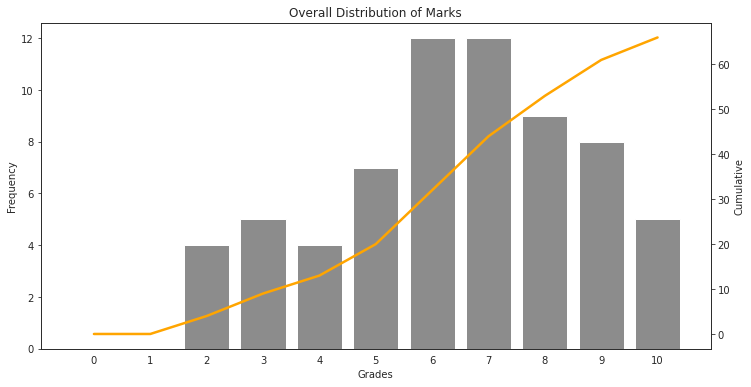

In [137]:
ax1 = sns.set_style(style='white', rc=None)
fig, ax1 = plt.subplots(figsize = (12,6))
ax2 = ax1.twinx()

plt.title
sns.barplot(data=dfFC, y='Frequency', x='Grades', ax=ax1, ci=None, palette=['C7'])

sns.lineplot(data=dfFC['Cumulative'], sort='False', ax=ax2, color='orange', linewidth=2.5)
plt.title('Overall Distribution of Marks')

# Plots

**1. Overall Distribution of Marks**

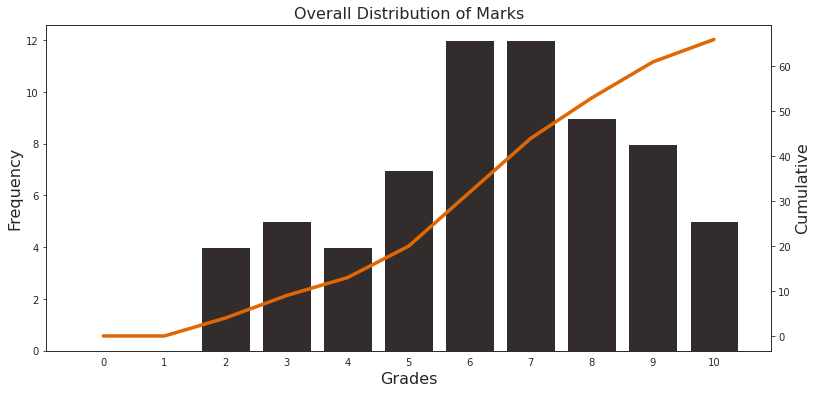

In [228]:
# Subplot
fig, ax1 = plt.subplots(figsize=(13,6))
#Barplot
ax1.set_title('Overall Distribution of Marks', fontsize=16)
ax1.set_xlabel('Marks', fontsize=16)
ax1.set_ylabel('Frequency in number', fontsize=16)
ax1 = sns.barplot(x='Grades', y='Frequency', data=dfFC, color='#332c2b')
ax1.tick_params(axis='y')
# Creating another axis
ax2 = ax1.twinx()
# Lineplot
ax2 = sns.lineplot(x='Grades', y='Cumulative', data=dfFC, color='#e06704', linewidth=3.5)
ax2.set_ylabel('Cumulative', fontsize=16)

ax2.tick_params(axis='y')

**2. Overall Distribution of Marks (%)**

In [1]:
# Subplot
fig, ax1 = plt.subplots(figsize=(13,6))
#Barplot
ax1.set_title('Overall Distribution of Marks (%)', fontsize=16)
ax1.set_xlabel('Marks', fontsize=16)
ax1.set_ylabel('Frequency in number', fontsize=16)
ax1 = sns.barplot(x='Grades', y='Frequency%', data=dfFC, color='#332c2b')
ax1.tick_params(axis='y')
# Creating another axis
ax2 = ax1.twinx()
# Lineplot
ax2 = sns.lineplot(x='Grades', y='Cumulative%', data=dfFC, color='#e06704', linewidth=3.5)
ax2.set_ylabel('Cumulative%', fontsize=16)

ax2.tick_params(axis='y')

NameError: name 'plt' is not defined

**3. Mean Grade by Student**

In [362]:
meanm=round(dfFC['Mean'].mean(),2)
dfFC['Mean_All_Grades_Student'] = meanm
dfFC

,Students,Course1,Course2,Course3,Course4,Course5,Course6,Grades,Cumulative,Frequency,Cumulative%,Frequency%,Sum,Mean,Std_Dev,Skew,Kurtosis,Mean_All_Grades_Student,Std_Dev_All_Grades_Student
0,a,3,6,6,7,4,8,0,0,0,0.0,0.0,34,5.67,1.86,-0.39,-0.94,6.43,2.2
1,b,3,7,7,2,5,10,1,0,0,0.0,0.0,34,5.67,2.94,0.21,-0.75,6.43,2.2
2,c,6,8,6,2,6,9,2,4,4,6.1,6.1,37,6.17,2.40,-0.94,1.69,6.43,2.2
3,d,4,9,5,8,6,8,3,9,5,13.6,7.6,40,6.67,1.97,-0.25,-1.83,6.43,2.2
4,e,7,10,7,9,6,9,4,13,4,19.7,6.1,48,8.00,1.55,0.00,-1.88,6.43,2.2
5,f,2,8,7,8,6,10,5,20,7,30.3,10.6,41,6.83,2.71,-1.18,2.14,6.43,2.2
6,g,2,7,10,7,5,9,6,32,12,48.5,18.2,40,6.67,2.88,-0.71,0.26,6.43,2.2
7,h,4,7,7,5,5,9,7,44,12,66.7,18.2,37,6.17,1.83,0.51,-0.62,6.43,2.2
8,i,3,6,5,3,7,8,8,53,9,80.3,13.6,32,5.33,2.07,-0.05,-1.72,6.43,2.2
9,j,6,7,9,8,6,10,9,61,8,92.4,12.1,46,7.67,1.63,0.38,-1.48,6.43,2.2


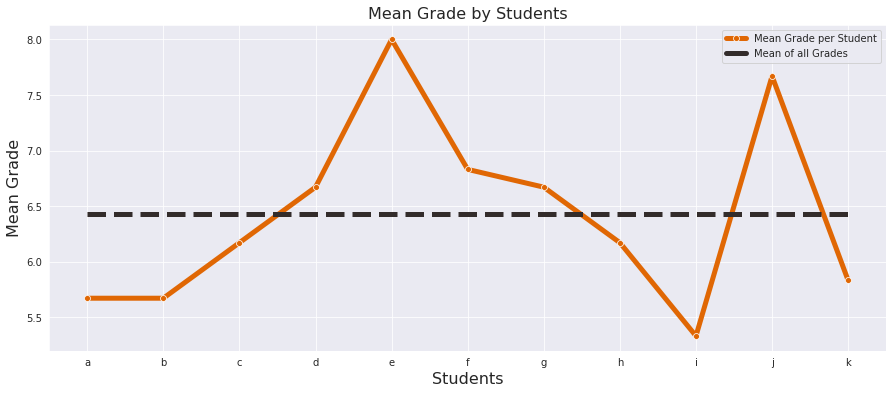

In [370]:
fig, ax1 = plt.subplots(figsize=(15,6))
sns.set_style('darkgrid')

ax1.set_title('Mean Grade by Students', fontsize=16)
ax1.set_xlabel('Students', fontsize=16)
ax1.set_ylabel('Mean Grade', fontsize=16)
sns.lineplot(y='Mean', x='Students', data=dfFC, ci=None, marker='o', color= '#e06704',label='Mean Grade per Student', linewidth=5)
x = sns.lineplot(y='Mean_All_Grades_Student', x='Students', data=dfFC, color='#332c2b', label='Mean of all Grades', linewidth=5)
x.lines[1].set_linestyle("--")

**4. STD Dev of Grade by Student**

In [375]:
stds=round(dfFC['Std_Dev'].mean(),2)
dfFC['Std_Dev_All_Grades_Student'] = stds
dfFC.head(2)

,Students,Course1,Course2,Course3,Course4,Course5,Course6,Grades,Cumulative,Frequency,Cumulative%,Frequency%,Sum,Mean,Std_Dev,Skew,Kurtosis,Mean_All_Grades_Student,Std_Dev_All_Grades_Student,Avarage_Skeweness
0,a,3,6,6,7,4,8,0,0,0,0.0,0.0,34,5.67,1.86,-0.39,-0.94,6.43,2.2,2.2
1,b,3,7,7,2,5,10,1,0,0,0.0,0.0,34,5.67,2.94,0.21,-0.75,6.43,2.2,2.2


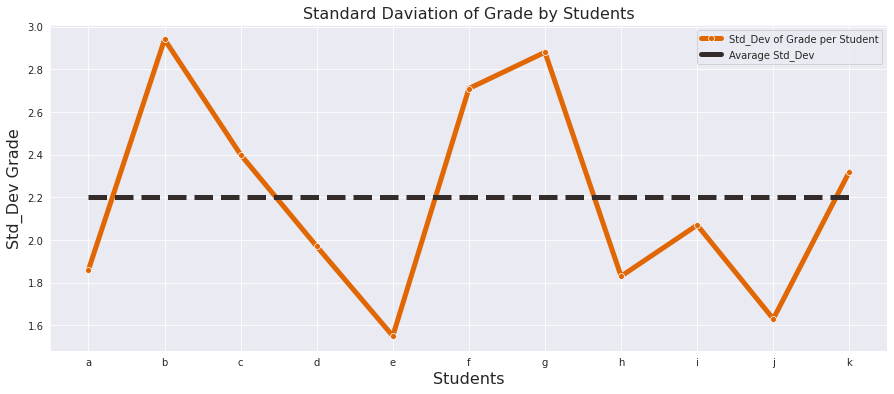

In [376]:
fig, ax1 = plt.subplots(figsize=(15,6))
sns.set_style('darkgrid')

ax1.set_title('Standard Daviation of Grade by Students', fontsize=16)
ax1.set_xlabel('Students', fontsize=16)
ax1.set_ylabel('Std_Dev Grade', fontsize=16)
sns.lineplot(y='Std_Dev', x='Students', data=dfFC, ci=None, marker='o', color= '#e06704',label='Std_Dev of Grade per Student', linewidth=5)
x = sns.lineplot(y='Std_Dev_All_Grades_Student', x='Students', data=dfFC,color='#332c2b', label='Avarage Std_Dev', linewidth=5)
x.lines[1].set_linestyle("--")

**5. Skeweness of Grades by Student**

In [379]:
skws=round(dfFC['Skew'].mean(),2)
dfFC['Avarage_Skeweness'] = skws
dfFC.head(2)

,Students,Course1,Course2,Course3,Course4,Course5,Course6,Grades,Cumulative,Frequency,Cumulative%,Frequency%,Sum,Mean,Std_Dev,Skew,Kurtosis,Mean_All_Grades_Student,Std_Dev_All_Grades_Student,Avarage_Skeweness
0,a,3,6,6,7,4,8,0,0,0,0.0,0.0,34,5.67,1.86,-0.39,-0.94,6.43,2.2,-0.19
1,b,3,7,7,2,5,10,1,0,0,0.0,0.0,34,5.67,2.94,0.21,-0.75,6.43,2.2,-0.19


Text(0.5, 1.0, 'Skeweness of Grades by Student')

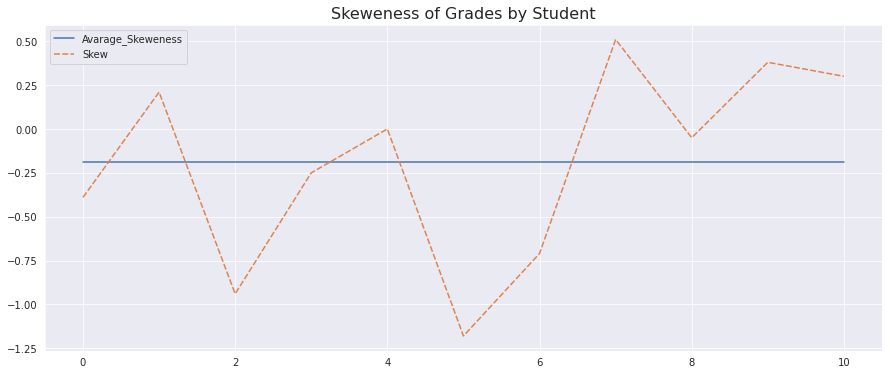

In [429]:
testingdf = pd.DataFrame()
testingdf['Students'] = dfFC['Students']
testingdf['Avarage_Skeweness'] = dfFC['Avarage_Skeweness']
testingdf['Skew'] = dfFC['Skew']


fig, ax1 = plt.subplots(figsize=(15,6))
sns.set_style('darkgrid')
ax1 = sns.lineplot(data=testingdf)

plt.title('Skeweness of Grades by Student', fontsize=16)
# plt.xlabel('Students', fontsize=16)
# plt.ylabel('Skeweness', fontsize=16)



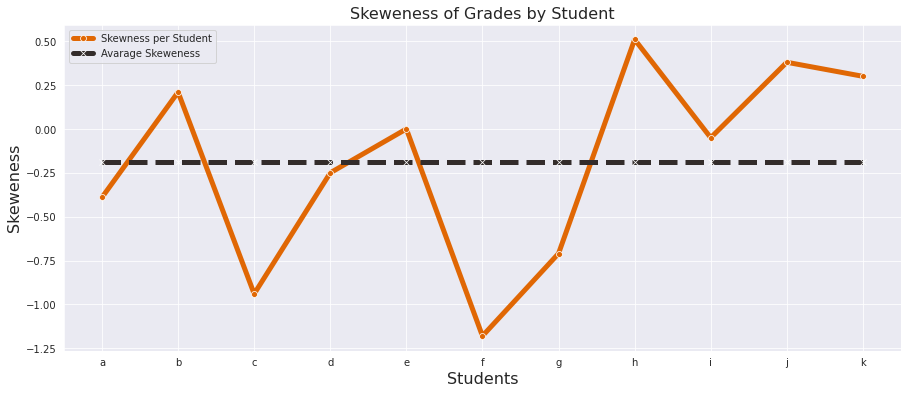

In [448]:
fig, ax1 = plt.subplots(figsize=(15,6))
sns.set_style('darkgrid')

ax1.set_title('Skeweness of Grades by Student', fontsize=16)
ax1.set_xlabel('Students', fontsize=16)
ax1.set_ylabel('Skeweness', fontsize=16)
sns.lineplot(y='Skew', x='Students', data=dfFC, ci=None, marker='o', color= '#e06704',label='Skewness per Student', linewidth=5)
xs = sns.lineplot(y='Avarage_Skeweness', x='Students', marker='x', data=dfFC,color='#332c2b', label='Avarage Skeweness', linewidth=5)
xs.lines[1].set_linestyle("--")


**6. Kurtosis of Grades by Student**

In [425]:
kurtk=round(dfFC['Kurtosis'].mean(),2)
dfFC['Avarage_Kurtosis'] = kurtk
dfFC.head(2)

,Students,Course1,Course2,Course3,Course4,Course5,Course6,Grades,Cumulative,Frequency,...,Frequency%,Sum,Mean,Std_Dev,Skew,Kurtosis,Mean_All_Grades_Student,Std_Dev_All_Grades_Student,Avarage_Skeweness,Avarage_Kurtosis
0,a,3,6,6,7,4,8,0,0,0,...,0.0,34,5.67,1.86,-0.39,-0.94,6.43,2.2,-0.19,-0.6
1,b,3,7,7,2,5,10,1,0,0,...,0.0,34,5.67,2.94,0.21,-0.75,6.43,2.2,-0.19,-0.6


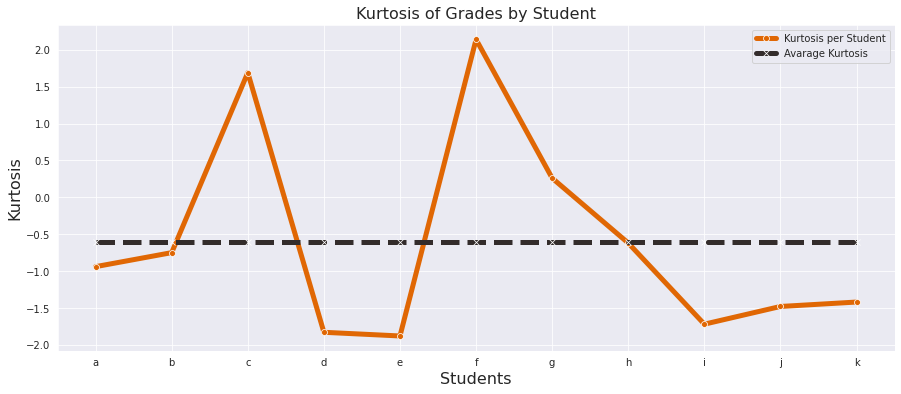

In [455]:
fig, ax1 = plt.subplots(figsize=(15,6))
sns.set_style('darkgrid')

ax1.set_title('Kurtosis of Grades by Student', fontsize=16)
ax1.set_xlabel('Students', fontsize=16)
ax1.set_ylabel('Kurtosis', fontsize=16)
sns.lineplot(y='Kurtosis', x='Students', data=dfFC, ci=None, marker='o', color= '#e06704',label='Kurtosis per Student', linewidth=5)
xs = sns.lineplot(y='Avarage_Kurtosis', x='Students', marker='x', data=dfFC,color='#332c2b', label='Avarage Kurtosis', linewidth=5)
xs.lines[1].set_linestyle("--")

In [574]:
df2 = df.copy()
df2=df2.set_index('Students')
df2 = df2.T
df2

Students,a,b,c,d,e,f,g,h,i,j,k
Course1,4,7,6,2,6,9,3,8,5,9,4
Course2,7,10,8,8,7,7,9,8,10,8,8
Course3,5,7,9,7,9,6,4,6,10,9,7
Course4,5,2,2,3,3,7,7,8,7,4,5
Course5,6,7,7,5,4,8,5,4,8,7,7
Course6,10,10,9,10,10,8,9,8,10,8,9


In [577]:
course_l = []
for i, row in df2.iterrows():
       course_l.append(i)

df2['Course'] = course_l

Students,Course,a,b,c,d,e,f,g,h,i,j,k
Course1,Course1,4,7,6,2,6,9,3,8,5,9,4
Course2,Course2,7,10,8,8,7,7,9,8,10,8,8
Course3,Course3,5,7,9,7,9,6,4,6,10,9,7
Course4,Course4,5,2,2,3,3,7,7,8,7,4,5
Course5,Course5,6,7,7,5,4,8,5,4,8,7,7
Course6,Course6,10,10,9,10,10,8,9,8,10,8,9


In [629]:
Crs = df2.Course.values
a = df2.a.values
b = df2.b.values
c = df2.c.values
d = df2.d.values
e = df2.e.values
f = df2.f.values
g = df2.g.values
h = df2.h.values
i = df2.i.values
j = df2.j.values
k = df2.k.values

fdf = pd.DataFrame()

fdf['Course'] = Crs
fdf['a'] = a
fdf['b'] = b
fdf['c'] = c
fdf['d'] = d
fdf['e'] = e
fdf['f'] = f
fdf['g'] = g
fdf['h'] = h
fdf['i'] = i
fdf['j'] = j
fdf['k'] = k

slist = fdf.sum(axis=1)

mlist = round(fdf.mean(axis=1),2)

stdlist = fdf.std(axis=1)

sklist = fdf.skew(axis=1)

klist = fdf.kurtosis(axis=1)
fdf['Sum'] = slist
fdf['Mean'] = mlist
fdf['Std_Dev'] = stdlist
fdf['Skewness'] = sklist
fdf['Kurtosis'] = klist

In [631]:
fdf['Average_Mean'] = round(fdf.Mean.mean(),2)
fdf['Average_Std_Dev'] = round(fdf.Std_Dev.mean(),2)
fdf['Average_Skewness'] = round(fdf.Skewness.mean(),2)
fdf['Average_Kurtosis'] = round(fdf.Kurtosis.mean(),2)
fdf

,Course,a,b,c,d,e,f,g,h,i,...,k,Sum,Mean,Std_Dev,Skewness,Kurtosis,Average_Mean,Average_Std_Dev,Average_Skewness,Average_Kurtosis
0,Course1,4,7,6,2,6,9,3,8,5,...,4,63,5.73,2.370270,0.010923,-1.116348,6.88,1.64,-0.01,-1.15
1,Course2,7,10,8,8,7,7,9,8,10,...,8,90,8.18,1.078720,0.738723,-0.353597,6.88,1.64,-0.01,-1.15
2,Course3,5,7,9,7,9,6,4,6,10,...,7,79,7.18,1.887760,-0.100000,-0.919626,6.88,1.64,-0.01,-1.15
3,Course4,5,2,2,3,3,7,7,8,7,...,5,53,4.82,2.182576,0.071116,-1.589918,6.88,1.64,-0.01,-1.15
4,Course5,6,7,7,5,4,8,5,4,8,...,7,68,6.18,1.470930,-0.378959,-1.312760,6.88,1.64,-0.01,-1.15
5,Course6,10,10,9,10,10,8,9,8,10,...,9,101,9.18,0.873863,-0.408694,-1.621315,6.88,1.64,-0.01,-1.15


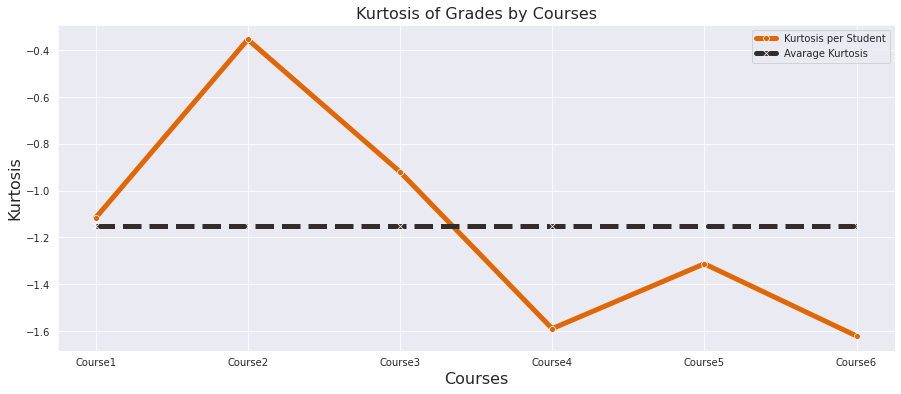

In [633]:
fig, ax1 = plt.subplots(figsize=(15,6))
sns.set_style('darkgrid')

ax1.set_title('Kurtosis of Grades by Courses', fontsize=16)
ax1.set_xlabel('Courses', fontsize=16)
ax1.set_ylabel('Kurtosis', fontsize=16)
sns.lineplot(y='Kurtosis', x='Course', data=fdf, ci=None, marker='o', color= '#e06704',label='Kurtosis per Student', linewidth=5)
xs = sns.lineplot(y='Average_Kurtosis', x='Course', marker='x', data=fdf,color='#332c2b', label='Avarage Kurtosis', linewidth=5)
xs.lines[1].set_linestyle("--")

In [ ]:
figure = plt.figure(figsize=(20,4))
sns.barplot(y= 'Students', x= 'Course1', data=df)

